In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_colwidth', 1500)

# Load Processed Data

In [10]:
data = pd.read_csv('data_processed.csv')

In [11]:
data.dropna(inplace=True)

In [12]:
data.isna().sum()

text       0
dialect    0
dtype: int64

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

In [ ]:
data.sample(20)

,text,dialect
18292,مصر جو قوي,1
30102,مش كره اخ واله انتهي,1
48283,هيكون تقرير مرءي جميل,0
143595,السيده نيكولا كتر خيره بتفهم الناس زي الطلبه قبيل قلنا عامل الوقت والحكومه لسه ماقعدو زي الناس نطو لينا رقبتنا اها الكلام قالتوا السيده,3
74105,السخنه عارفه حاجه,0
62707,مش هتجوز مجنون مطرقع نسافر سوا الفجر فجاه عشان عايزين نقعد عالبحر يخليني اجرب الحشيش البيره نعيش بساطه تلقاءيه نفضل صغيرين نكبر نتجن اكتر مش هقبل بالروتين ولا بجواز صالونات ولا بحد يخفي الطفل التلقاءيه الي جوايا مستحيل,0
144148,الناس شغاله فضايح وثوره اتسرقت,3
135374,مقفول الساعه رفيده لانهم عاملين محطه ابو جنزير زي نقطه تجمع لامنجيه وبجيبوا المعتقلين ويقعدوهم الارض واليله معتقلين اكتر شخص قادرين نصلهم او نعرف خبرهم,3
18828,جوك وافتح البنانيه وقول هاح,1
114414,الهاك بالسلاح وكل الفرق معها سلاح,2


# Modelling

## Machine Learning

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['dialect'], shuffle=True, test_size=0.2, random_state=42)

In [16]:
print("X Train Shape:", X_train.shape)
print("y Train Shape:", y_train.shape)
print("X Test Shape:", X_test.shape)
print("y Test Shape:", y_test.shape)

X Train Shape: (117886,)
y Train Shape: (117886,)
X Test Shape: (29472,)
y Test Shape: (29472,)


In [17]:
def ML_evaluator(model, X_test, y_test):
  y_pred = model.predict(X_test)
  print("Test Accuracy:", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt="d")
  plt.show()

### Modelling & Evaluating ML Algorithms

#### NB Model with Count Vectorizer

In [63]:
cv = CountVectorizer(ngram_range=(1,2), binary=False)
cv.fit(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [64]:
class_freq = np.bincount(y_train)
total_samples = len(y_train)
class_prior = class_freq / total_samples

# Create a MultinomialNB model with class weights
class_prior

array([0.39012266, 0.24771389, 0.18689242, 0.09762822, 0.07764281])

Test Accuracy: 0.8101248642779587
              precision    recall  f1-score   support

           0       0.78      0.95      0.85     11475
           1       0.89      0.73      0.80      7231
           2       0.81      0.88      0.84      5522
           3       0.79      0.48      0.60      2894
           4       0.84      0.63      0.72      2350

    accuracy                           0.81     29472
   macro avg       0.82      0.73      0.76     29472
weighted avg       0.82      0.81      0.80     29472



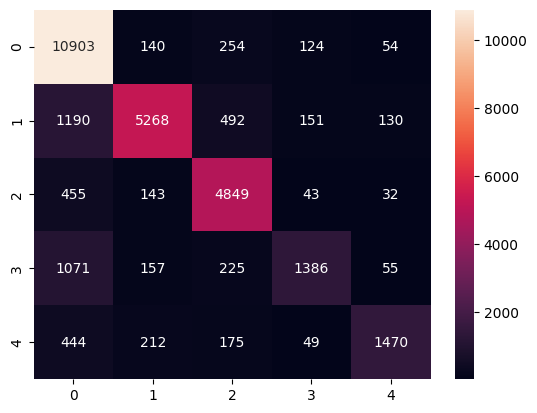

In [65]:
NB = MultinomialNB(class_prior=[0.05,0.05,0.25,0.25,0.3]).fit(X_train_cv, y_train)
ML_evaluator(NB, X_test_cv, y_test)

In [67]:
with open('BOW.pickle', 'wb') as handle:
    pickle.dump(cv, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
# Save the model
with open('NB_model.pickle', 'wb') as handle:
    pickle.dump(NB, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### LR Model with TfIDF Vectorizer

In [15]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Test Accuracy: 0.8011672095548317
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     11475
           1       0.76      0.80      0.78      7231
           2       0.85      0.79      0.82      5522
           3       0.84      0.50      0.63      2894
           4       0.90      0.58      0.70      2350

    accuracy                           0.80     29472
   macro avg       0.83      0.72      0.76     29472
weighted avg       0.81      0.80      0.79     29472



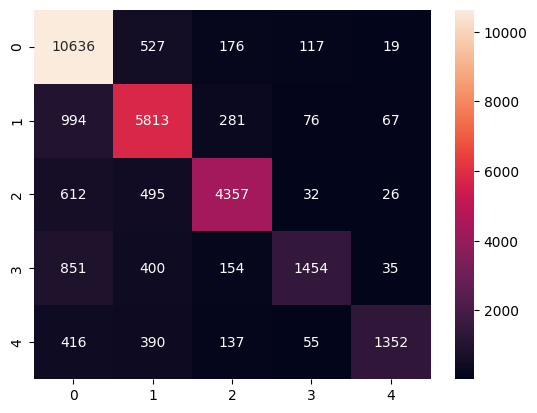

In [16]:
LR = LogisticRegression().fit(X_train_vec, y_train)
ML_evaluator(LR, X_test_vec, y_test)

## Deep Learning

In [18]:
def DL_evaluator(model, X_test, y_test):
  y_pred = model.predict(X_test, verbose=0)
  y_pred = np.argmax(y_pred, axis=1)
  print("Test Accuracy:", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt="d")
  plt.show()

### LSTM

In [44]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

In [45]:
# Tokenize the texts and convert them to sequences of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['text'])
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
val_sequences = tokenizer.texts_to_sequences(val_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

In [46]:
# Pad the sequences to ensure they have the same length
max_len = 100
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_len)
val_padded_sequences = pad_sequences(val_sequences, maxlen=max_len)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_len)

In [47]:
train_labels = to_categorical(train_df['dialect'])
val_labels = to_categorical(val_df['dialect'])
test_labels = to_categorical(test_df['dialect'])

In [54]:
# Define the LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
LSTM_model = Sequential()
LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
LSTM_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
LSTM_model.add(Dense(5, activation='softmax'))

In [55]:
# Compile the model
LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# Train the model
epochs = 2
batch_size = 32
LSTM_history = LSTM_model.fit(train_padded_sequences, train_labels, epochs= epochs, batch_size = batch_size, validation_data=(val_padded_sequences, val_labels))

Epoch 1/2
3316/3316 [==============================] - 1436s 432ms/step - loss: 0.6518 - accuracy: 0.7653 - val_loss: 0.5356 - val_accuracy: 0.8102
Epoch 2/2
3316/3316 [==============================] - 1358s 410ms/step - loss: 0.2635 - accuracy: 0.9132 - val_loss: 0.5975 - val_accuracy: 0.8068


In [51]:
LSTM_model.save('LSTM_model.h5')

Test Accuracy: 0.8163680781758957
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     11475
           1       0.79      0.82      0.80      7231
           2       0.82      0.84      0.83      5522
           3       0.75      0.61      0.68      2894
           4       0.85      0.62      0.72      2350

    accuracy                           0.82     29472
   macro avg       0.81      0.76      0.78     29472
weighted avg       0.82      0.82      0.81     29472



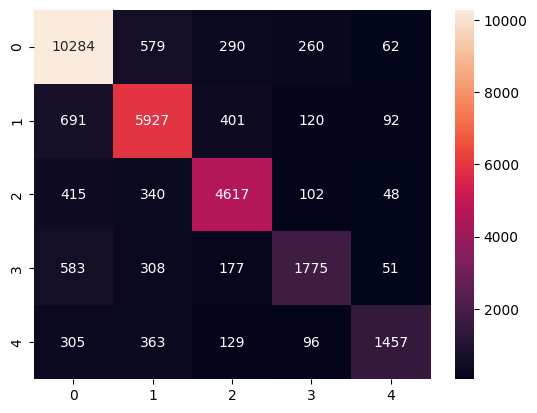

In [57]:
DL_evaluator(LSTM_model, test_padded_sequences, test_df['dialect'])

In [61]:
# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [58]:
LSTM_model.save('LSTM_model.h5')

## AraBert

In [11]:
%%capture
! pip install transformers
! pip3 install ktrain

In [12]:
from ktrain import text
import ktrain

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['dialect'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [14]:
classes = np.array([0,1,2,3,4])
classes

array([0, 1, 2, 3, 4])

In [15]:
t = text.Transformer('aubmindlab/bert-base-arabertv2', maxlen=76, class_names=classes)
trn = t.preprocess_train(X_train.to_numpy(), y_train.to_numpy())
val = t.preprocess_test(X_val.to_numpy(), y_val.to_numpy())

preprocessing train...
language: ar
train sequence lengths:
	mean : 12
	95percentile : 32
	99percentile : 43


Is Multi-Label? False
preprocessing test...
language: ar
test sequence lengths:
	mean : 12
	95percentile : 32
	99percentile : 43


In [16]:
model = t.get_classifier()
model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  135193344 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  3845      
                                                                 
Total params: 135,197,189
Trainable params: 135,197,189
Non-trainable params: 0
_________________________________________________________________


In [17]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=64)
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
checkpointer = ModelCheckpoint(filepath='best_arabert_model.hdf5', save_best_only=True)

In [18]:
arabert_history = learner.fit(5e-5, 50, steps_per_epoch=300, callbacks=[early_stop])

Epoch 1/50
300/300 [==============================] - 393s 1s/step - loss: 0.8723 - accuracy: 0.6851 - val_loss: 0.7489 - val_accuracy: 0.7386
Epoch 2/50
300/300 [==============================] - 334s 1s/step - loss: 0.6997 - accuracy: 0.7493 - val_loss: 0.6540 - val_accuracy: 0.7687
Epoch 3/50
300/300 [==============================] - 334s 1s/step - loss: 0.6720 - accuracy: 0.7562 - val_loss: 0.6347 - val_accuracy: 0.7753
Epoch 4/50
300/300 [==============================] - 334s 1s/step - loss: 0.6203 - accuracy: 0.7766 - val_loss: 0.6009 - val_accuracy: 0.7824
Epoch 5/50
300/300 [==============================] - 354s 1s/step - loss: 0.6025 - accuracy: 0.7836 - val_loss: 0.5911 - val_accuracy: 0.7843
Epoch 6/50
300/300 [==============================] - 353s 1s/step - loss: 0.5413 - accuracy: 0.8084 - val_loss: 0.5925 - val_accuracy: 0.8031
Epoch 7/50
300/300 [==============================] - 333s 1s/step - loss: 0.4903 - accuracy: 0.8291 - val_loss: 0.5706 - val_accuracy: 0.7987

In [19]:
test = t.preprocess_test(X_test.to_numpy(), y_test.to_numpy())

preprocessing test...
language: ar
test sequence lengths:
	mean : 11
	95percentile : 31
	99percentile : 43


In [24]:
y_pred = learner.predict(test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

29472/29472 [==============================] - 1001s 34ms/step
Test accuracy: 0.8217630293159609


              precision    recall  f1-score   support

           0       0.83      0.92      0.87     11475
           1       0.78      0.82      0.80      7231
           2       0.84      0.84      0.84      5522
           3       0.83      0.54      0.66      2894
           4       0.84      0.66      0.74      2350

    accuracy                           0.82     29472
   macro avg       0.83      0.76      0.78     29472
weighted avg       0.82      0.82      0.82     29472



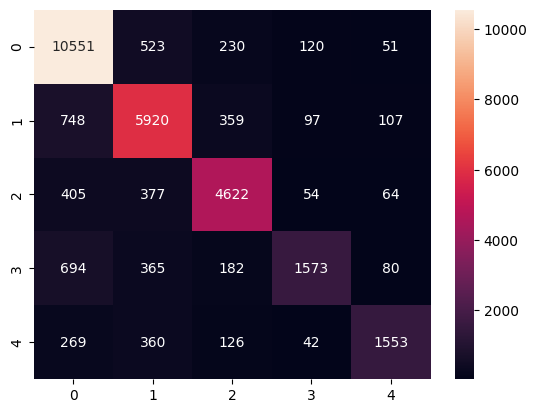

In [26]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()